# LDA from scratch!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit, logit
from sklearn.linear_model import LogisticRegression


Explain what LDA is
 and applications of it

- Create practice data
- 5000 0's and 5000 1's
- Use a rand num generator based on covar materix so each group is centered around dif things
- Label the data

In [10]:
# Starting input for numpy's pseudo-random generator
np.random.seed(12)
num_observations = 5000

# Generates two sets of random observations (x1 and x2) from multivariate normal distributions with specific means and covariance matrices
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

# Stacks x1 and x2 vertically to make a single array
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
# Create a list of labels (0 or 1) for simulated_separable_features
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

Text(0.5, 1.0, 'Randomly Generated Data')

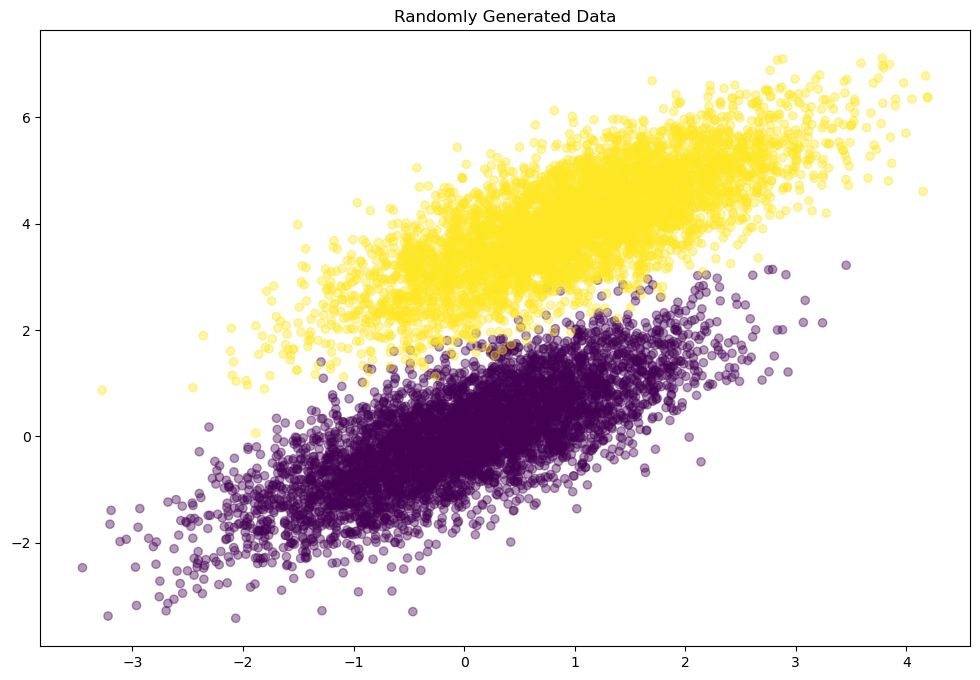

In [11]:
# Plot the random data set
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)
plt.title("Randomly Generated Data")

- Sigmoid function information

The sigmoid function, also known as the logistic function, is commonly used to map any real-valued number to a value between 0 and 1.


In [12]:
def sigmoid(scores):
    """
    Calculate the sigmoid function for a given set of scores.

    Parameters:
    - scores (numpy.ndarray): An array of real-valued scores.

    Returns:
    - numpy.ndarray: An array of values between 0 and 1, representing the sigmoid
                    transformation of the input scores.
    """
    return 1 / (1 + np.exp(-scores))


- Explain other math
- Explain likely hood

In [13]:
def log_likelihood(features, target, weights):
    """
    Calculate the log-likelihood of logistic regression.

    Parameters:
    - features (numpy.ndarray): Input features, represented as a 2D array.
    - target (numpy.ndarray): Binary target variable, represented as a 1D array.
    - weights (numpy.ndarray): Coefficients (weights) associated with each feature.

    Returns:
    - float: Log-likelihood value for the given logistic regression model.
    """
    # Calculate the dot product of features and weights to get the scores
    scores = np.dot(features, weights)
    
    # Calculate the log-likelihood using the logistic regression formula
    log_likelihood = np.sum(target * scores - np.log(1 + np.exp(scores)))
    
    return log_likelihood

In [14]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept=False):
    """
    Perform logistic regression using gradient descent.

    Parameters:
    - features (numpy.ndarray): Input features, represented as a 2D array.
    - target (numpy.ndarray): Binary target variable, represented as a 1D array.
    - num_steps (int): Number of steps (iterations) for gradient descent.
    - learning_rate (float): Step size for each iteration of gradient descent.
    - add_intercept (bool, optional): Flag to indicate whether to add an intercept term. Default is False.

    Returns:
    - numpy.ndarray: Coefficients (weights) for the logistic regression model.
    """
    # Add intercept term to features if specified
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    # Initialize weights to zeros
    weights = np.zeros(features.shape[1])

    # Perform gradient descent for the specified number of steps
    for step in range(num_steps):
        # Calculate scores and predictions using current weights
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights using gradient descent
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient

        # Print log-likelihood every 10,000 steps for monitoring
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))

    return weights

In [15]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)


-4346.264779152365
-148.70672276805357
-142.96493623107838
-141.5453030715737
-141.06031965930796
-140.87031585891606
-140.79025912753815
-140.75505002269912
-140.73914503180953
-140.7318349891588
-140.72843666694826
-140.72684471255326
-140.72609508950472
-140.72574086052296
-140.72557306887177
-140.7254934578617
-140.72545564250743
-140.7254376661433
-140.72542911609156
-140.7254250479478
-140.72542311181698
-140.72542219020232
-140.72542175145273
-140.72542154256132
-140.7254214431011
-140.72542139574284
-140.7254213731925
-140.7254213624546
-140.72542135734136
-140.72542135490647


COmpare it to the other model

In [16]:
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print (clf.intercept_, clf.coef_)
print (weights)


[-14.09231079] [[-5.05902155  8.28959202]]
[-14.09225541  -5.05899648   8.28955762]


In [17]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))


Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


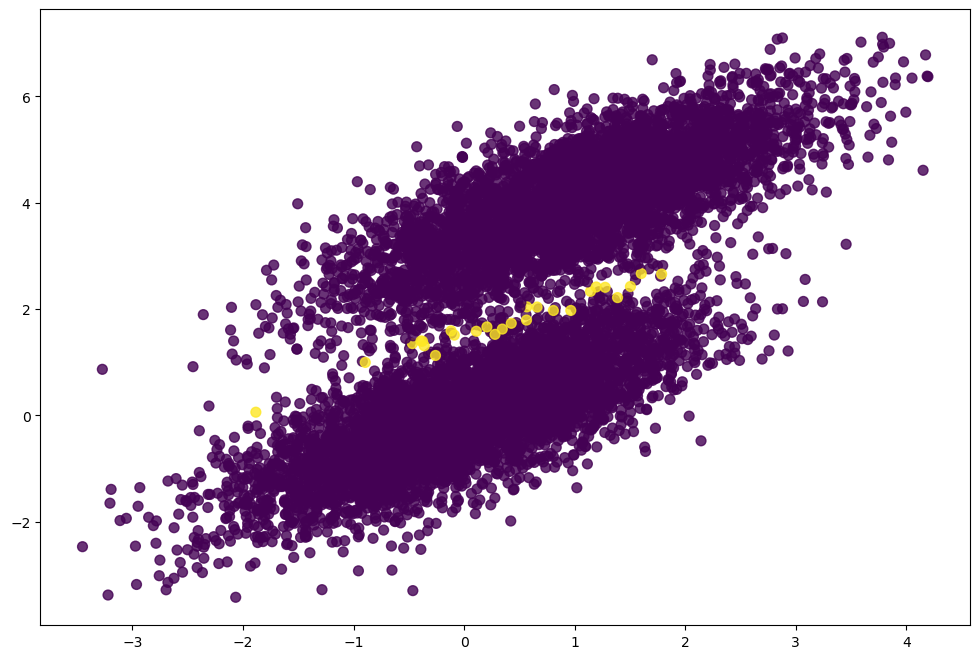

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)


## Sources

https://beckernick.github.io/logistic-regression-from-scratch/
https://youtu.be/yIYKR4sgzI8?si=o6w4EpFzdKjkmNov

